   Temperature   Pressure  Vibration  Fault
0    87.454012  26.661964   2.617057      0
1   145.071431  58.771085   2.469788      0
2   123.199394  88.565125   9.062546      0
3   109.865848  75.900240   2.495462      0
4    65.601864  82.590503   2.719497      0


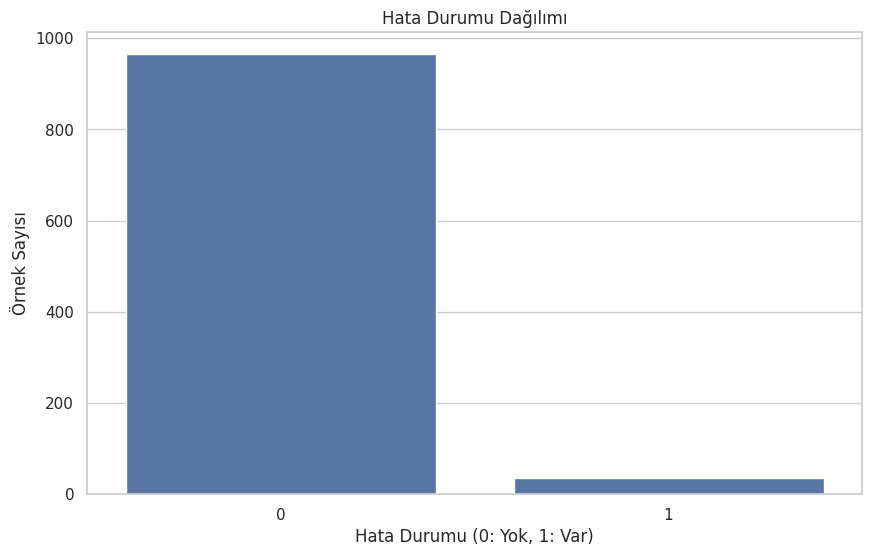

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


np.random.seed(42)

# 1000 örnek veri oluşturma
data_size = 1000
temperature = np.random.uniform(50, 150, data_size)  # Sıcaklık
pressure = np.random.uniform(10, 100, data_size)  # Basınç
vibration = np.random.uniform(0, 10, data_size)  # Titreşim



fault = np.where((temperature > 120) & (pressure < 30) & (vibration > 5), 1, 0)

# Veri çerçevesi oluşturma
data = pd.DataFrame({
    'Temperature': temperature,
    'Pressure': pressure,
    'Vibration': vibration,
    'Fault': fault
})


print(data.head())


data.to_csv('machine_fault_data.csv', index=False)


plt.figure(figsize=(10, 6))
sns.countplot(x='Fault', data=data)
plt.title('Hata Durumu Dağılımı')
plt.xlabel('Hata Durumu (0: Yok, 1: Var)')
plt.ylabel('Örnek Sayısı')
plt.show()


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       190
           1       1.00      0.60      0.75        10

    accuracy                           0.98       200
   macro avg       0.99      0.80      0.87       200
weighted avg       0.98      0.98      0.98       200

[[190   0]
 [  4   6]]


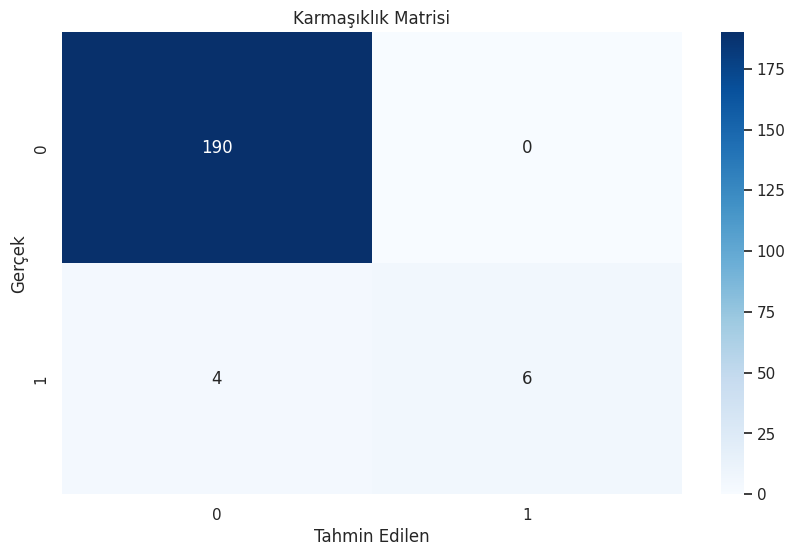

In [12]:
# Özellikler ve etiketleri ayırma
X = data.drop(columns=['Fault'])
y = data['Fault']

# Veriyi eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest sınıflandırıcı modeli oluşturma
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Tahminler
y_pred = model.predict(X_test)

# Model değerlendirmesi
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()
